<a href="https://colab.research.google.com/github/ranjith13119/CNN/blob/main/TransferLearningTechnique_DogBreed_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
#https://habr.com/en/post/447732/

In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp /content/kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dog-breed-identification -p /content/dataset/test 

In [ ]:
!unzip '/content/dataset/test/dog-breed-identification.zip' -d '/content/drive/MyDrive/CNN/Dogs/Dataset'

In [ ]:
!pip install tensorflow==2.1.0

In [ ]:
import tensorflow as tf 

In [ ]:
tf.__version__

'2.1.0'

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("/content/drive/MyDrive/CNN/Dogs/Dataset/labels.csv")

In [ ]:
df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
working_path = "/content/drive/MyDrive/CNN/Dogs/"
!ls "/content/drive/MyDrive/CNN/Dogs"

Dataset  kaggle.json


In [ ]:
df.keys

In [ ]:
df["filename"] = df.apply(lambda x : (str(x['id']) + '.jpg'), axis = 1)

In [ ]:
df.head() 

In [ ]:
num_classes = 50
selected_breed_list = list(df.groupby('breed').count().sort_values(by='id', ascending=False).head(num_classes).index)

In [ ]:
selected_breed_list  ## Dog Breed details 

In [ ]:
#Showing Unique Breed Selected:
breeds = pd.Series(df['breed'])
print("total number of breeds to classify",len(breeds.unique()))

total number of breeds to classify 120


In [ ]:
df["breed"].value_counts().plot.bar(figsize=(20, 10))

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

# Image Processing and Visualization
from IPython.display import display, Image
from matplotlib.pyplot import imread

# Data Spliting Module
from sklearn.model_selection import train_test_split

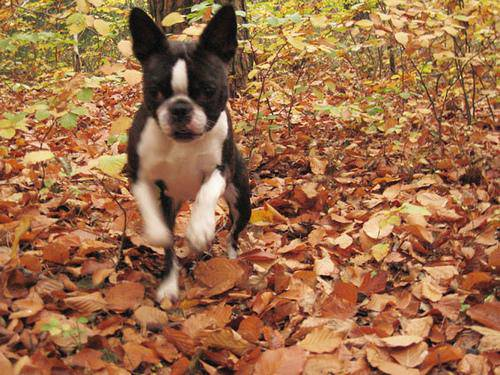

In [ ]:
Image('/content/drive/MyDrive/CNN/Dogs/Dataset/train/000bec180eb18c7604dcecc8fe0dba07.jpg') 

In [ ]:
len(np.unique(df["breed"].to_numpy())) 

120

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_validation = train_test_split(df, test_size=0.2, shuffle=True)

In [ ]:
df_train.shape

(8177, 3)

In [ ]:
df_train.head()

,id,breed,filename
249,05c128c8e3ef0c2739f181f9c5677f56,australian_terrier,05c128c8e3ef0c2739f181f9c5677f56.jpg
5594,8d59450a985ebb3790c70d672e616c68,yorkshire_terrier,8d59450a985ebb3790c70d672e616c68.jpg
1530,25cadbca01601bb69736e4835d60b048,saluki,25cadbca01601bb69736e4835d60b048.jpg
946,17193d29b9833d783133f4b13f12f513,english_foxhound,17193d29b9833d783133f4b13f12f513.jpg
8202,cd0587a34594afd8b79387cf137c66e7,german_short-haired_pointer,cd0587a34594afd8b79387cf137c66e7.jpg


In [ ]:
df_validation.shape

(2045, 3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    rescale=1./255,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )
validation_datagen = ImageDataGenerator(
                        rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        rescale=1./255,
                        shear_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        fill_mode='nearest'
                      )

In [ ]:
train_generator= train_datagen.flow_from_dataframe(
                      dataframe=df_train,
                      directory="/content/drive/MyDrive/CNN/Dogs/Dataset/train",
                      x_col='filename',
                      y_col="breed", 
                      subset="training",
                      batch_size=32,
                      seed=42,
                      shuffle=True,
                      class_mode="categorical",
                      target_size=(224, 224))

Found 8177 validated image filenames belonging to 120 classes.


In [ ]:
validation_set = validation_datagen.flow_from_dataframe(
                dataframe=df_validation,
                directory='/content/drive/MyDrive/CNN/Dogs/Dataset/train', 
                x_col="filename",
                y_col="breed",
                target_size=(224, 224),
                class_mode="categorical",
                batch_size=32,
                seed=42,
                shuffle=True
            ) 

Found 2045 validated image filenames belonging to 120 classes.


In [ ]:
df_submission = pd.read_csv('/content/drive/MyDrive/CNN/Dogs/Dataset/sample_submission.csv', dtype=str)

In [ ]:
df_submission.head()

In [ ]:
df_submission["id"] = df_submission.apply(lambda x : (x['id'] + '.jpg'), axis = 1)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255.)
test_generator= test_datagen.flow_from_dataframe(
                      dataframe=df_submission,
                      directory="/content/drive/MyDrive/CNN/Dogs/Dataset/test",
                      x_col='id',
                      y_col= None,
                      batch_size=32,
                      seed=42,
                      shuffle=False,
                      class_mode=None,
                      target_size=(224, 224))

Found 10357 validated image filenames.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import shutil
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

from tensorflow.keras.applications import inception_v3
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
from tensorflow.keras.applications.mobilenet import MobileNet

from tensorflow.keras.applications.nasnet import NASNetMobile

from tensorflow.keras.models import load_model

In [ ]:
INIT_LR = 1e-4
EPOCHS = 20
BS = 32 
IMAGE_SIZE = [224, 224] 
#IMAGE_SIZE = [256, 256] 

In [ ]:
from glob import glob
folders = np.unique(pd.Series(df['breed']))

In [ ]:
len(folders)

120

In [ ]:

import datetime as dt
start = dt.datetime.now()

INIT_LR = 1e-4
EPOCHS = 20
BS = 16
TESTING_SPLIT=0.3	# 70/30 %

NUM_CLASSES = 120
IMAGE_SIZE = 256

#strModelFileName = "models/ResNet50.h5"

# strModelFileName = "models/InceptionV3.h5"
strModelFileName = "models/InceptionV3_Sgd.h5"

#IMAGE_SIZE = 224
#strModelFileName = "models/MobileNetV2.h5"

#IMAGE_SIZE = 224
#strModelFileName = "models/NASNetMobileSgd.h5"

In [ ]:
def createModelMobileNetV2():
  # First, create the NN and load pre-trained
  # weights for it ('imagenet')
  # Note that we are not loading last layers of 
  # the network (include_top=False) whether the last layer should be added or not, as we are 
  # going to add layers of our own:
  base_model = MobileNet(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
	
  for layer in base_model.layers:
	  layer.trainable = False

  # Then attach our layers at the end. These are 
  # to build "classifier" that makes sense of 
  # the patterns previous layers provide:
  x = base_model.output
  x = Dense(512)(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)
		  
  predictions = Dense(len(folders), activation='softmax')(x)

  # Create a model
  model = Model(inputs=base_model.input, outputs=predictions)


			  
  # As always, there are different possible 
  # settings, I tried few and chose the best:
  #  model.compile(optimizer='adam', 
  #    loss='categorical_crossentropy', 
  #    metrics=['accuracy'])
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy']) 

  #model.summary()            
		  
  return(model)

In [ ]:
def createModelResNet50():
  base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

  x = base_model.output
  x = Dense(512)(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)
		  
  predictions = Dense(len(folders), activation='softmax')(x)

  model = Model(inputs=base_model.input, 
	outputs=predictions)

  for layer in base_model.layers:
	  layer.trainable = False
			  
#  model.compile(loss='categorical_crossentropy', 
#	optimizer='adam', metrics=['accuracy'])
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy']) 

  #model.summary()            
		  
  return(model)

In [ ]:
def createModelInceptionV3():
#  model.layers[0].trainable = False
#  model.compile(optimizer='sgd', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 

  base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(255, 255, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  predictions = Dense(len(folders),activation='softmax')(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)

  for layer in base_model.layers:
	  layer.trainable = False

#  model.compile(optimizer='adam', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])
		  
  #model.summary()      
		  
  return(model)

In [ ]:
def createModelNASNetMobile():
#  model.layers[0].trainable = False
#  model.compile(optimizer='sgd', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 

  base_model = NASNetMobile(weights = 'imagenet', 
	include_top = False, 
	input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  predictions = Dense(len(folders),
	activation='softmax')(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)

  for layer in base_model.layers:
  	layer.trainable = False

#  model.compile(optimizer='adam', 
#	 loss='categorical_crossentropy', 
#    metrics=['accuracy']) 
  model.compile(optimizer='sgd', 
	loss='categorical_crossentropy', 
	metrics=['accuracy'])
		  
  #model.summary()      
		  
  return(model)

First of all, we are experimenting, so we need to be able to delete NNs we have saved before, but do not need anymore. The following function deletes NN if the file exists:

In [ ]:
# Make sure that previous "best network" is deleted.
def deleteSavedNet(best_weights_filepath):
	if(os.path.isfile(best_weights_filepath)):
		os.remove(best_weights_filepath)
		print("deleteSavedNet():File removed")
	else:
		print("deleteSavedNet():No file to remove") 

In [ ]:
#deleteSavedNet(working_path + strModelFileName)
model = createModelInceptionV3()
	#if not os.path.exists(working_path + "models"):
	#	os.makedirs(working_path + "models")
	#    
	#if not os.path.exists(working_path + 
	#	strModelFileName):
	# model = createModelResNet50()
	
	# model = createModelMobileNetV2()
	# model = createModelNASNetMobile()
	#else:
	#	model = load_model(working_path + strModelFileName)

Checkpoints are very important when teaching the NNs. You can create an array of functions to be called at the end of each training epoch, for example, you can save the NN if if shows better results than the last one saved.


In [ ]:
checkpoint = ModelCheckpoint(working_path + 
	strModelFileName, monitor='val_acc',
	verbose=1, save_best_only=True, 
	mode='auto', save_weights_only=False)

callbacks_list = [ checkpoint ]

In [ ]:
# Calculate sizes of training and validation sets
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size

#STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
#STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
#STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
#print(STEP_SIZE_TRAIN, STEP_SIZE_VALID, STEP_SIZE_TEST)

# Set to False if we are experimenting with 
# some other part of code, use history that
# was calculated before (and is still in
# memory
bDoTraining = True 

if bDoTraining == True:
	# model.fit_generator does the actual training
	# Note the use of generators and callbacks
	# that were defined earlier
	history = model.fit_generator(generator=train_generator,
		steps_per_epoch=STEP_SIZE_TRAIN,
		validation_data=validation_set,
		validation_steps=STEP_SIZE_VALID,
		epochs=EPOCHS,
		callbacks=callbacks_list)

	# --- After fitting, load the best model
	# This is important as otherwise we'll 
	# have the LAST model loaded, not necessarily
	# the best one.
	model.load_weights(working_path + strModelFileName)

	# --- Presentation part

	# summarize history for accuracy
	plt.plot(history.history['acc'])
	plt.plot(history.history['val_acc'])
	plt.title('model accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['acc', 'val_acc'], loc='upper left')
	plt.show()
			
	# summarize history for loss
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['loss', 'val_loss'], loc='upper left')
	plt.show()
		  
	# As grid optimization of NN would take too long, 
	# I did just few tests with different parameters.
	# Below I keep results, commented out, in the same 
	# code. As you can see, Inception shows the best
	# results:
		  
	# Inception: 
	# adam: val_acc 0.79393
	# sgd: val_acc 0.80892
		  
	# Mobile:
	# adam: val_acc 0.65290
	# sgd: Epoch 00015: val_acc improved from 0.67584 to 0.68469
	# sgd-30 epochs: 0.68
		  
	# NASNetMobile, adam: val_acc did not improve from 0.78335
	# NASNetMobile, sgd: 0.8

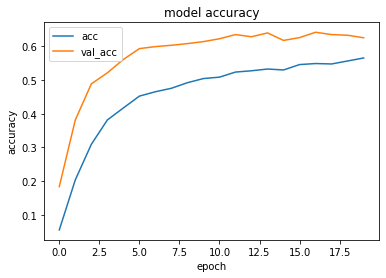

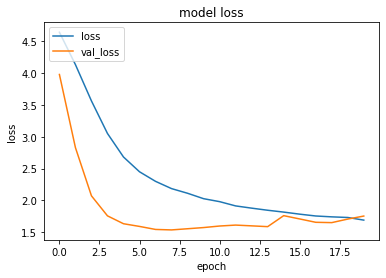

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()
    
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

In [ ]:
import cv2
j = 0

# Final cycle performs testing on the entire
# testing set. 
for file_name in os.listdir("/content/drive/MyDrive/CNN/Dogs/Dataset/test/"):

	img = image.load_img("/content/drive/MyDrive/CNN/Dogs/Dataset/test/"+ file_name);

	img_1 = image.img_to_array(img)
	img_1 = cv2.resize(img_1, (255, 255), 
		interpolation = cv2.INTER_AREA)
	img_1 = np.expand_dims(img_1, axis=0) / 255.

	y_pred = model.predict_on_batch(img_1)
	
	y_pred_ids = y_pred[0][-5:][::-1]

	print(file_name)
	for i in range(len(y_pred_ids)):
		print(y_pred[0][-5:][::-1])

	print("--------------------\n")

	j = j + 1

In the feature extraction experiment, you were only training a few layers on top of an MobileNet V2 base model. The weights of the pre-trained network were not updated during training.

One way to increase performance even further is to train (or "fine-tune") the weights of the top layers of the pre-trained model alongside the training of the classifier you added. The training process will force the weights to be tuned from generic feature maps to features associated specifically with the dataset.
Also, you should try to fine-tune a small number of top layers rather than the whole MobileNet model. In most convolutional networks, the higher up a layer is, the more specialized it is. The first few layers learn very simple and generic features that generalize to almost all types of images. As you go higher up, the features are increasingly more specific to the dataset on which the model was trained. The goal of fine-tuning is to adapt these specialized features to work with the new dataset, rather than overwrite the generic learning.

In [ ]:
def createModelInceptionV3():
#  model.layers[0].trainable = False
#  model.compile(optimizer='sgd', 
#    loss='categorical_crossentropy', 
#    metrics=['accuracy']) 

  base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(255, 255, 3))
		  
  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(512, activation='relu')(x)
  predictions = Dense(len(folders),activation='softmax')(x)

  model = Model(inputs = base_model.input, 
	outputs = predictions)
  base_model.trainable = True
  print("Number of layers in the base model: ", len(base_model.layers)) //311

  fine_tune_at = 100
  
  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
			  
  #As you are training a much larger model and want to readapt the pretrained weights, 
  #it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

  model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tensorflow.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])
		  
  return(model)

In [ ]:
def createModelMobileNetV2():
  # First, create the NN and load pre-trained
  # weights for it ('imagenet')
  # Note that we are not loading last layers of 
  # the network (include_top=False), as we are 
  # going to add layers of our own:
  base_model = MobileNet(weights='imagenet', include_top=False, pooling='avg', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
			
  # Then attach our layers at the end. These are 
  # to build "classifier" that makes sense of 
  # the patterns previous layers provide:
  x = base_model.output
  x = Dense(512)(x)
  x = Activation('relu')(x)
  x = Dropout(0.5)(x)
		  
  predictions = Dense(len(folders), activation='softmax')(x)

  # Create a model
  model = Model(inputs=base_model.input, outputs=predictions)
  base_model.trainable = True
  print("Number of layers in the base model: ", len(base_model.layers))

  fine_tune_at = 100
  
  for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False
			  
  #As you are training a much larger model and want to readapt the pretrained weights, 
  #it is important to use a lower learning rate at this stage. Otherwise, your model could overfit very quickly.

  model.compile(loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer = tensorflow.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              metrics=['accuracy'])

  #model.summary()            
		  
  return(model)

In [ ]:
fine_tune_epochs = 10
total_epochs =  EPOCHS + fine_tune_epochs

history = model.fit_generator(generator=train_generator,
		steps_per_epoch=STEP_SIZE_TRAIN,
		validation_data=validation_set,
		validation_steps=STEP_SIZE_VALID,
		epochs=total_epochs,
		callbacks=callbacks_list
)

In [ ]:
# baseModel.summary() 

In [ ]:
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(128, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(len(folders), activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# for layer in baseModel.layers:
# 	layer.trainable = False

In [ ]:
# model.summary()

In [ ]:
# opt = Adam(lr=INIT_LR, decay = INIT_LR / 20)
# model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=validation_set.n//validation_set.batch_size
# STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
# print(STEP_SIZE_TRAIN, STEP_SIZE_VALID, STEP_SIZE_TEST)

255 63 323


In [ ]:
# dog_breed_model = model.fit_generator(
#   train_generator,
#   validation_data=validation_set,
#   epochs=100,
#   steps_per_epoch=STEP_SIZE_TRAIN,
#   validation_steps=STEP_SIZE_VALID 
# )   

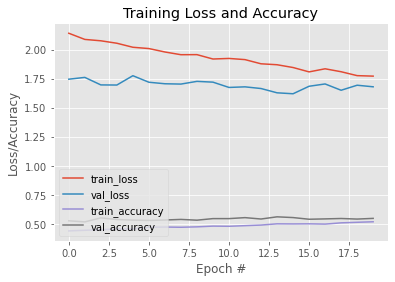

In [ ]:
# N = 100
# plt.style.use("ggplot")
# plt.figure()
# plt.plot(np.arange(0, N), dog_breed_model.history["loss"], label="train_loss")
# plt.plot(np.arange(0, N), dog_breed_model.history["val_loss"], label="val_loss")
# plt.plot(np.arange(0, N), dog_breed_model.history["accuracy"], label="train_accuracy")
# plt.plot(np.arange(0, N), dog_breed_model.history["val_accuracy"], label="val_accuracy")
# plt.title("Training Loss and Accuracy")
# plt.xlabel("Epoch #")
# plt.ylabel("Loss/Accuracy")
# plt.legend(loc="lower left") 

In [ ]:
# dog_breed_model.evaluate_generator(generator=validation_set, steps=STEP_SIZE_TEST)

In [ ]:
# test_generator.reset()
# pred=dog_breed_model.predict_generator(test_generator, steps=STEP_SIZE_TEST, verbose=1)

In [ ]:
# predicted_class_indices=np.argmax(pred,axis=1)
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
# filenames=test_generator.filenames
# results=pd.DataFrame({"Filename":filenames,
#                       "Predictions":predictions})
# results.to_csv("results.csv",index=False)

In [ ]:
# df_final = pd.read_csv('/content/drive/MyDrive/CNN/Dogs/Dataset/sample_submission.csv')
# df_final_submission = df_final["id"]
# df_final_submission.iloc[:,1:] = y_pred

In [ ]:
# final_df = df_final_submission.set_index('id')
# final_df.to_csv('Submission_1.csv')